##### K-Means Clustering

##### Dataset

Download `Mall_Customers.csv`

Location: https://mitu.co.in/dataset

Import the libraries

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

load the dataset

In [36]:
df = pd.read_csv('datasets/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [37]:
df.shape

(200, 5)

##### Describe the features

In [38]:
x = df.iloc[:, [3, 4]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


##### Elbow Method

In [39]:
from sklearn.cluster import KMeans

In [40]:
km = KMeans(n_clusters=10, n_init='auto', random_state=0)

In [41]:
labels = km.fit_predict(x)
labels

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([3, 4, 7, 4, 3, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 3, 4, 3, 4, 3, 4,
       7, 4, 7, 4, 3, 4, 3, 4, 7, 4, 7, 4, 7, 4, 7, 4, 3, 4, 3, 4, 3, 6,
       3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 0, 6, 0, 6, 6, 0, 0, 6, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 9, 2, 1, 2, 9, 2, 9, 2, 1, 0, 1, 2, 1, 0, 9, 2, 1, 2, 1, 2, 9,
       2, 1, 2, 9, 2, 9, 2, 1, 2, 1, 2, 9, 2, 1, 2, 9, 2, 9, 2, 1, 2, 9,
       2, 9, 2, 9, 8, 9, 8, 9, 8, 1, 8, 9, 8, 9, 8, 9, 8, 5, 8, 5, 8, 5,
       8, 5])

Fix Error

In [34]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [31]:
km.inertia_

14697.298899626936

In [42]:
sse = []
for i in range(1, 15 + 1):
    km = KMeans(n_clusters=i, n_init='auto', random_state=0)
    km.fit_predict(x)
    sse.append(km.inertia_)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

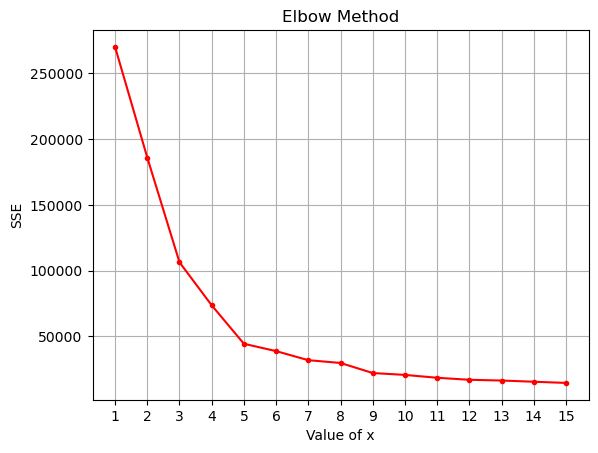

In [43]:
plt.title('Elbow Method')
plt.xlabel('Value of x')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1, 15 + 1))
plt.plot(range(1, 15 + 1), sse, marker='.', color='r')

In [44]:
%pip install kneed

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [45]:
from kneed import KneeLocator

In [46]:
help(KneeLocator)

Help on class KneeLocator in module kneed.knee_locator:

class KneeLocator(builtins.object)
 |  KneeLocator(x: Iterable[float], y: Iterable[float], S: float = 1.0, curve: str = 'concave', direction: str = 'increasing', interp_method: str = 'interp1d', online: bool = False, polynomial_degree: int = 7)
 |
 |  Once instantiated, this class attempts to find the point of maximum
 |  curvature on a line. The knee is accessible via the `.knee` attribute.
 |
 |  :param x: x values, must be the same length as y.
 |  :type x: 1D array of shape (`number_of_y_values`,) or list
 |  :param y: y values, must be the same length as x.
 |  :type y: 1D array of shape (`number_of_y_values`,) or list
 |  :param S: Sensitivity, the number of minimum number of data points below the local distance maximum before calling a knee. The original paper suggests default of 1.0
 |  :type S: float
 |  :param curve: If 'concave', algorithm will detect knees. If 'convex', it
 |      will detect elbows.
 |  :type curve: 

In [47]:
kl = KneeLocator(range(1, 15 + 1), sse, curve='convex', direction='decreasing')

In [48]:
kl.elbow

5

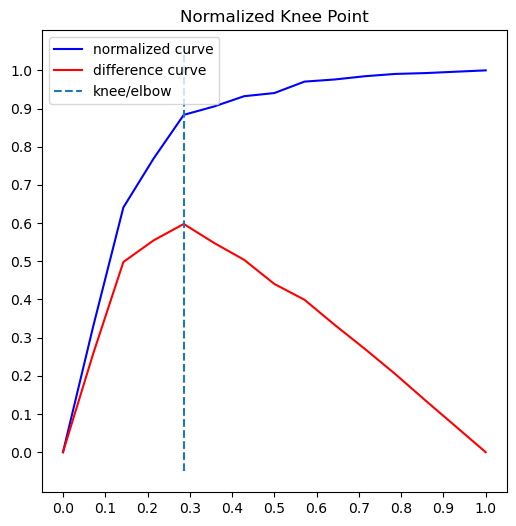

In [49]:
kl.plot_knee_normalized()

##### Silhoutte Score

In [50]:
from sklearn.metrics import silhouette_score

In [63]:
silh = []
for i in range(2, 15 + 1):
    km = KMeans(n_clusters=i, n_init='auto', random_state=0)
    labels = km.fit_predict(x)
    score = silhouette_score(x, labels)
    silh.append(score)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

<BarContainer object of 14 artists>

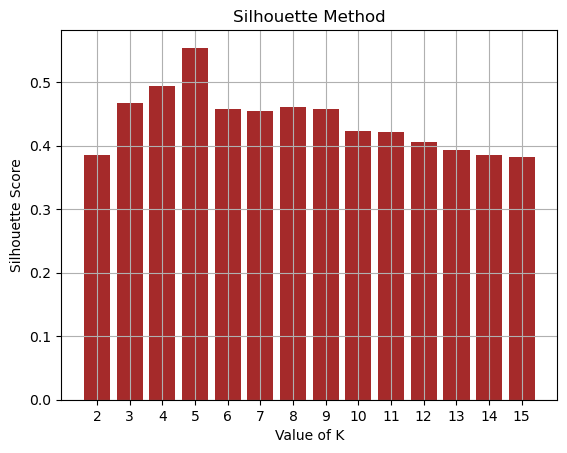

In [64]:
plt.title('Silhouette Method')
plt.xlabel('Value of K')
plt.ylabel('Silhouette Score')
plt.grid()
plt.xticks(range(2, 16))
plt.bar(range(2, 16), silh, color='brown')

##### Build the clusters

In [65]:
km = KMeans(n_clusters=5, n_init='auto', random_state=0)

In [66]:
labels = km.fit_predict(x)
labels

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [68]:
cents = km.cluster_centers_
cents

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

##### Visualise the clusters

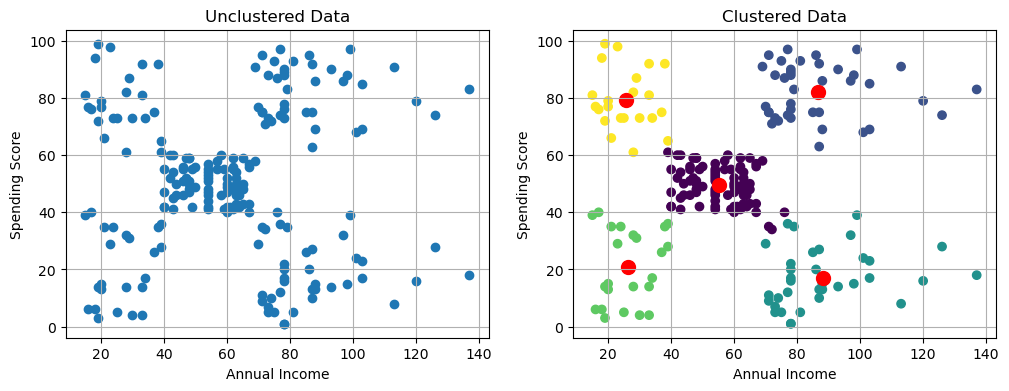

In [85]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()
plt.scatter(x.iloc[:, 0], x.iloc[:, 1])

plt.subplot(1, 2, 2)
plt.title('Clustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=labels)
plt.scatter(cents[:, 0], cents[:, 1], color='r', s=100)

##### Extract clusters

In [98]:
zero = df[labels == 0]
zero

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
43,44,Female,31,39,61
46,47,Female,50,40,55
47,48,Female,27,40,47
48,49,Female,29,40,42
49,50,Female,31,40,42
...,...,...,...,...,...
121,122,Female,38,67,40
122,123,Female,40,69,58
126,127,Male,43,71,35
132,133,Female,25,72,34


In [99]:
zero = df[labels == 0]
one = df[labels == 1]
two = df[labels == 2]
three = df[labels == 3]
four = df[labels == 4]

zero.shape, one.shape, two.shape, three.shape, four.shape

((81, 5), (39, 5), (35, 5), (23, 5), (22, 5))

##### Classify / Cluster new Customer

In [100]:
new = pd.DataFrame(data=[[45, 12],
                         [98, 67],
                         [34, 10],
                         [78, 65],
                         [55, 56]], columns=x.columns)
new

,Annual Income (k$),Spending Score (1-100)
0,45,12
1,98,67
2,34,10
3,78,65
4,55,56


In [101]:
km.predict(new)

array([3, 1, 3, 1, 0])

##### Export the cluster

In [102]:
zero.to_csv('datasets/customers0.csv', index=False)